<h3>Implementation of K-Means Algorithm</h3>

In [3]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Importing the dataset
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


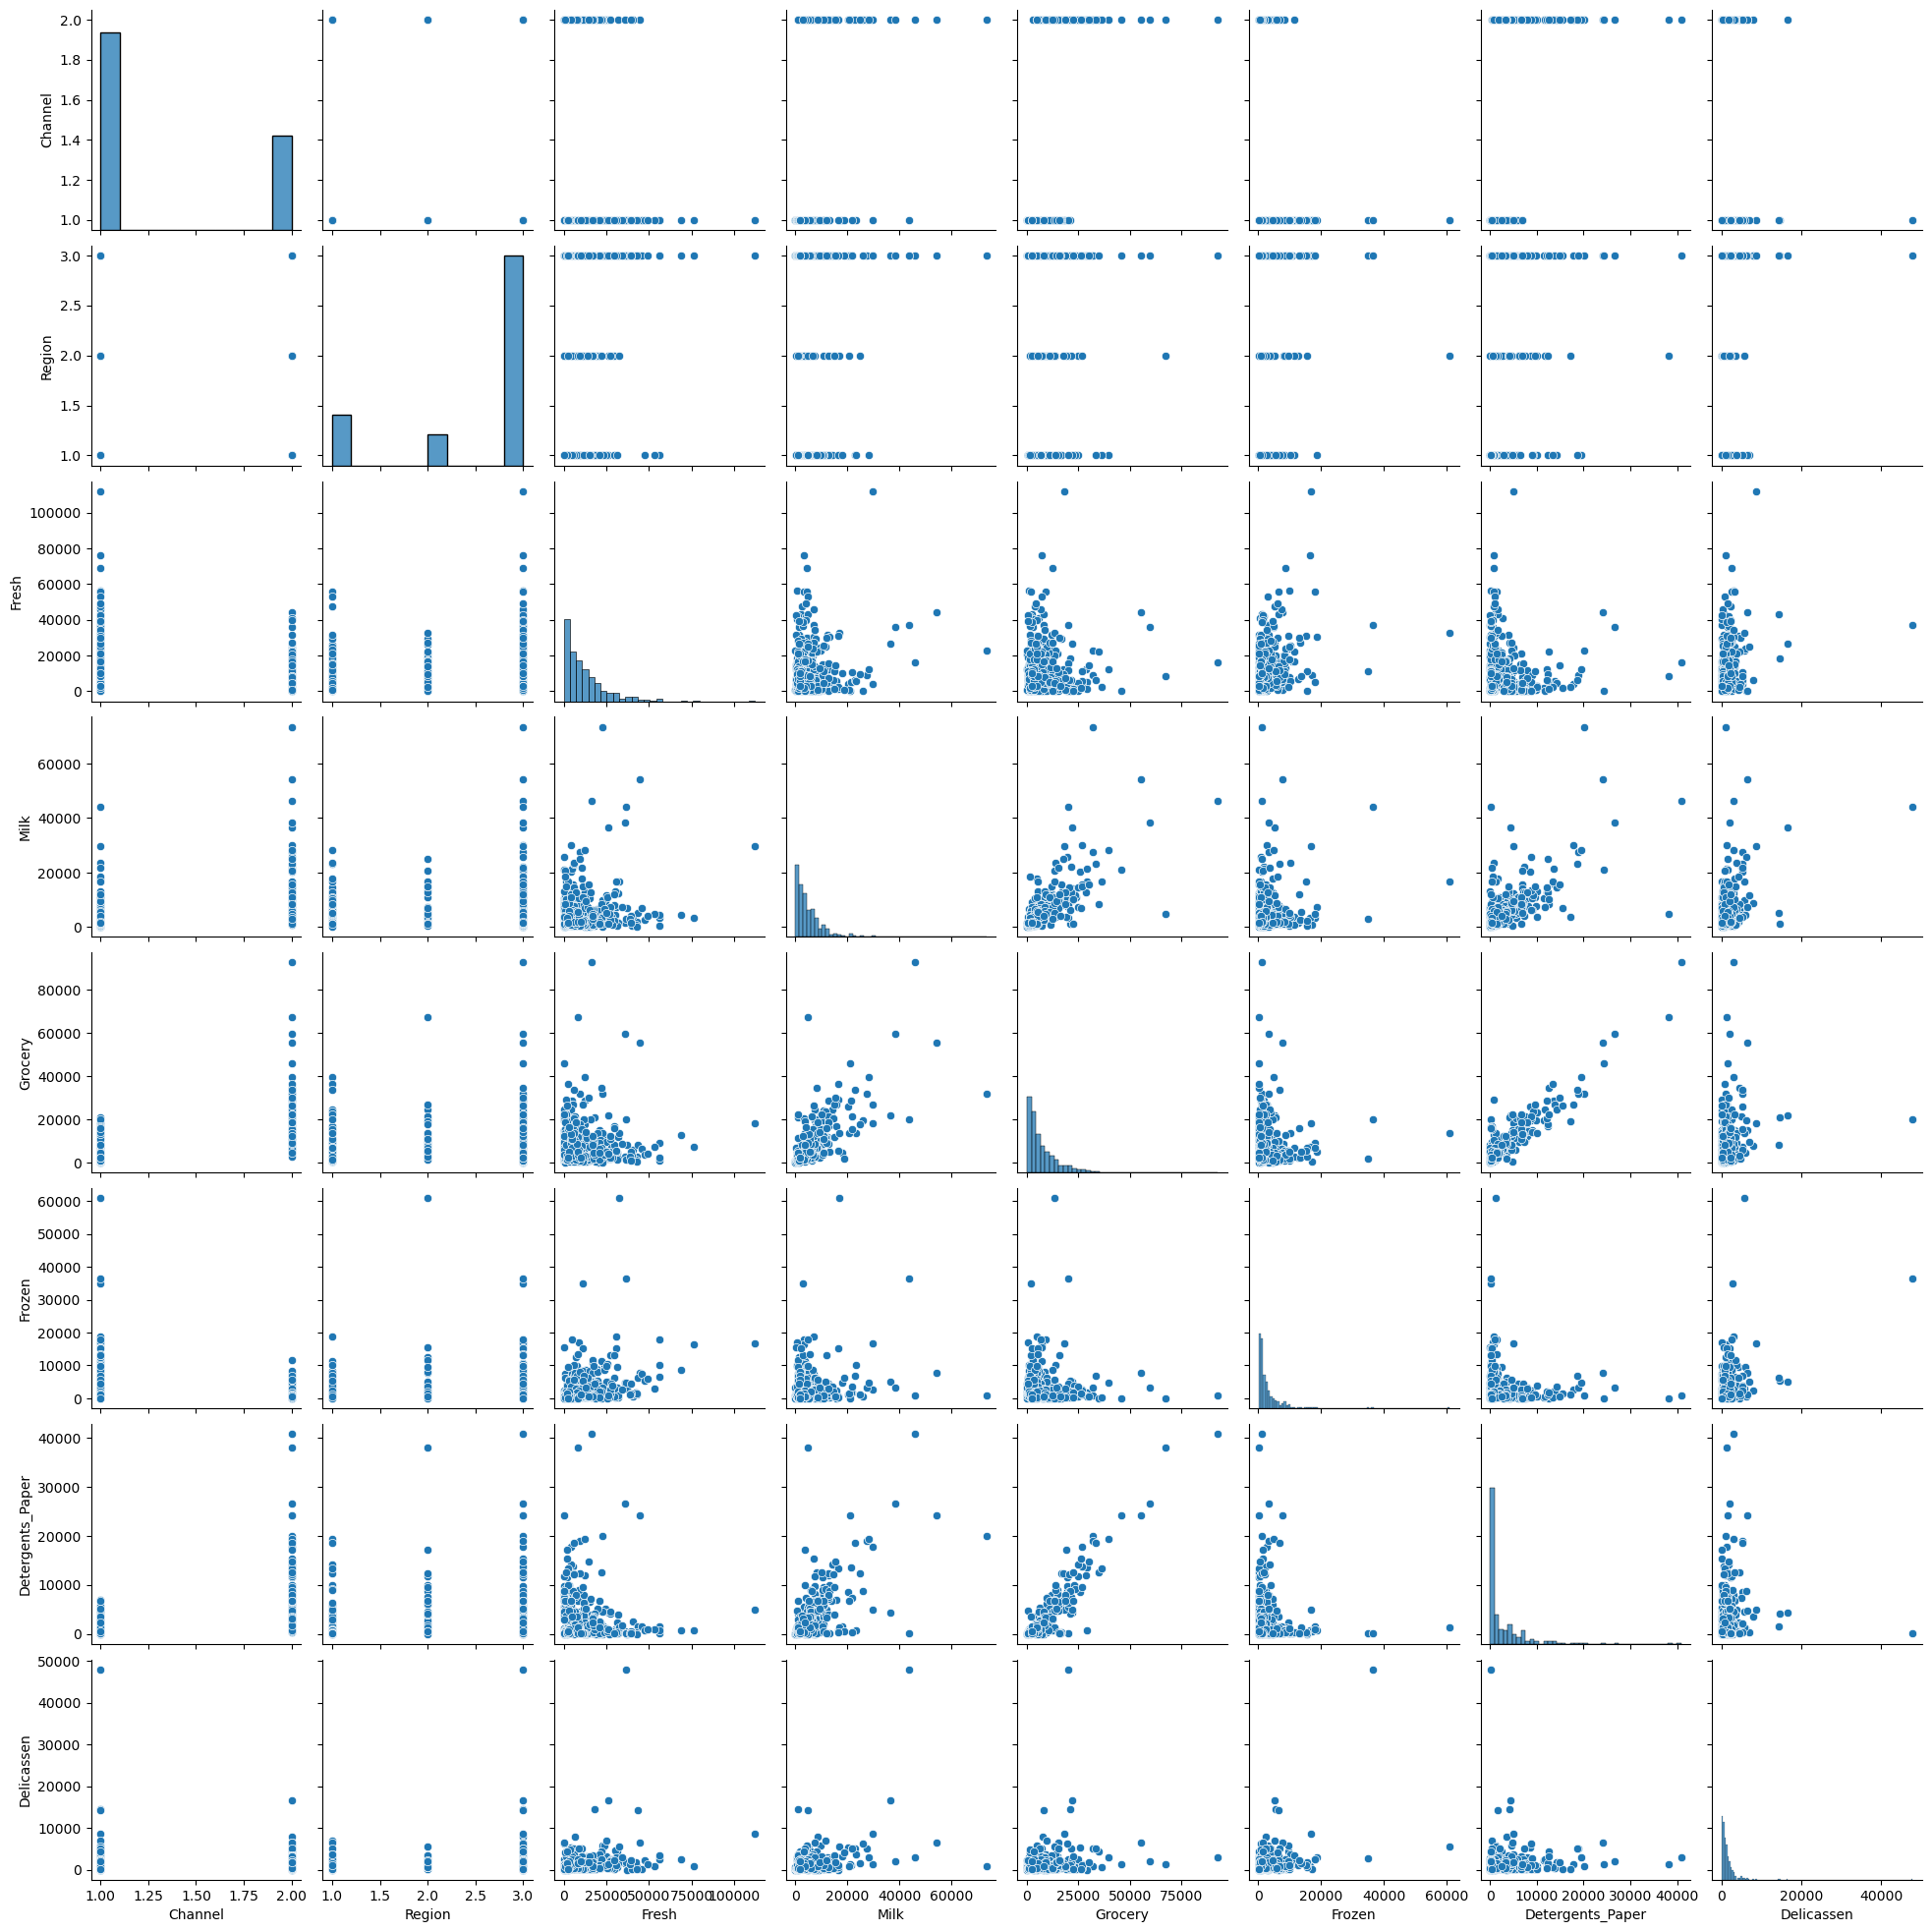

In [9]:
#Undersatnding the data using plots
sns.pairplot(data)
plt.show()

In [11]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data.Fresh=scaler.fit_transform(pd.DataFrame(data["Fresh"]))
data.Milk=scaler.fit_transform(pd.DataFrame(data["Milk"]))
data.Grocery=scaler.fit_transform(pd.DataFrame(data["Grocery"]))
data.Frozen=scaler.fit_transform(pd.DataFrame(data["Frozen"]))
data.Detergents_Paper=scaler.fit_transform(pd.DataFrame(data["Detergents_Paper"]))
data.Delicassen=scaler.fit_transform(pd.DataFrame(data["Delicassen"]))
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,2,3,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,2,3,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1,3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,2,3,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [13]:
#Applying PCA to reduce the number of features so to help in visualization
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_transformed=pca.fit_transform(data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]])

In [15]:
data=pd.DataFrame(x_transformed,columns=["Feature1","Feature2"])
data.head()

,Feature1,Feature2
0,0.020446,-0.004124
1,0.045003,-0.036889
2,0.040474,-0.013746
3,-0.092295,0.028786
4,-0.020514,0.106330


In [17]:
#Implementing K-Means
from sklearn.cluster import KMeans
list=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init="k-means++",random_state=42)
    model.fit_predict(data)
    list.append(model.inertia_)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

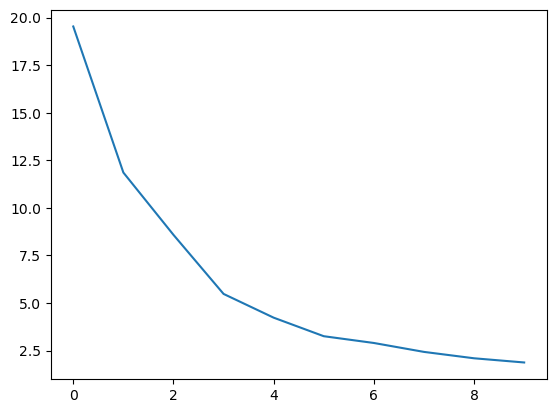

In [22]:
#plotting the elbow curve
plt.plot(list)

In [24]:
model=KMeans(n_clusters=4)
y_pred1=model.fit_predict(data)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


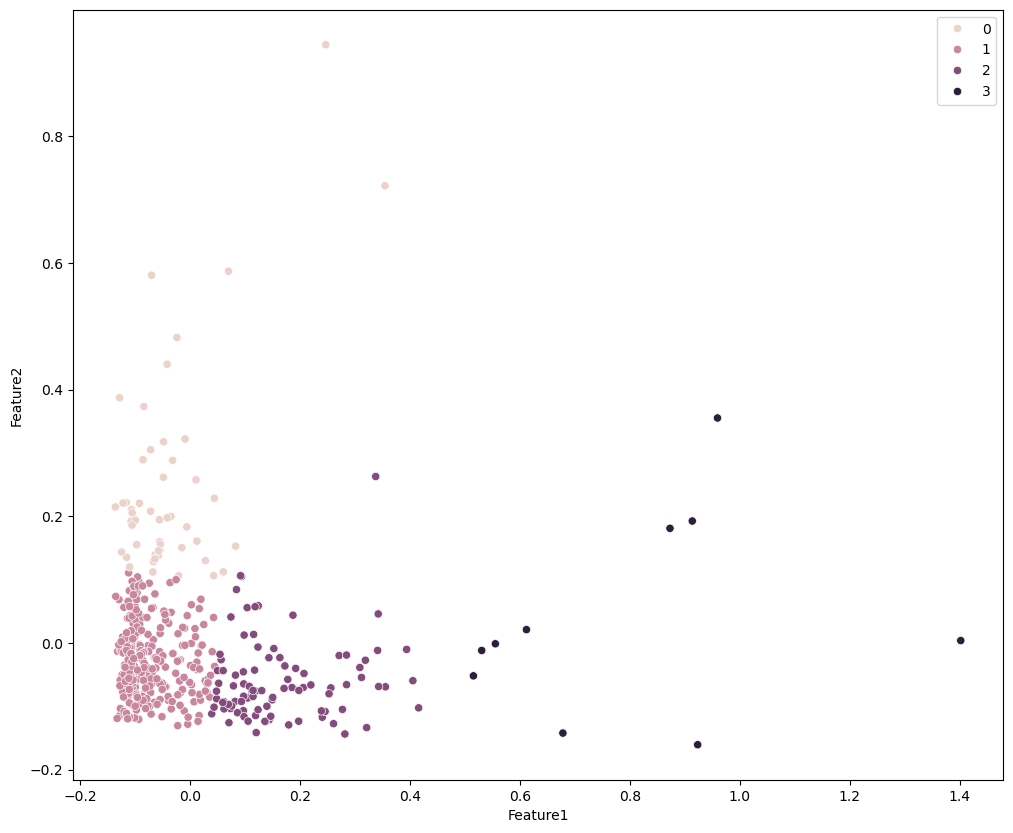

In [26]:
#PLotting the clusters
plt.figure(figsize=(12,10))
sns.scatterplot(x=data["Feature1"],y=data["Feature2"],hue=y_pred1)
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
score=silhouette_score(data,y_pred1)
print(score)

0.5093510646732814
